<a href="https://colab.research.google.com/github/Kshma29/sentiment_analysis_ml_project/blob/main/ML_Mini_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [77]:
from flask import Flask, render_template, url_for
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import svm
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt


In [78]:
trainingData = pd.read_csv("train.csv", encoding='unicode_escape')

In [79]:
trainingData.sample(frac=1).head(5)

,textID,text,selected_text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²)
24021,6ee881ba67,I went to the World Education fair today. It w...,I went to the World Education fair today. It w...,neutral,morning,46-60,Mauritania,4649658,1030700.0,5
20757,922777ecbd,Am soo happy about today .. the going home bit...,Am soo happy about today .. the going home bit...,neutral,morning,46-60,Bosnia and Herzegovina,3280819,51000.0,64
21952,8d7c8931df,I did wake up but i appear to have missed you...,missed,negative,noon,60-70,Denmark,5792202,42430.0,137
1481,15cfb1789b,No star replies to me,No star replies to me,neutral,night,70-100,United Kingdom,67886011,241930.0,281
27260,df0d124770,Going to bed. Hung out w. Aaron and Robin then...,Going to bed. Hung out w. Aaron and Robin then...,neutral,night,31-45,Czechia (Czech Republic),10708981,77240.0,139


In [80]:
train_X, test_X, train_Y, test_Y = model_selection.train_test_split(trainingData['text'], trainingData['sentiment'], test_size = 0.1, random_state = 0)

In [81]:
df_train = pd.DataFrame()
df_train['text'] = train_X
df_train['sentiment'] = train_Y

df_test = pd.DataFrame()
df_test['text'] = test_X
df_test['sentiment'] = test_Y

In [82]:
df_train

,text,sentiment
9383,eating breakfast getting ready to go to schoo...,negative
19455,Going to fold laundry and then hit the sack. I...,negative
20298,happy mothers day to all im off to spend the...,positive
14934,one of my favorite quotes ever,positive
18879,"yeah, that was my point >.< please dont make ...",negative
...,...,...
13123,i love them,positive
19648,"Oh, don`t spoil my fun, lol",negative
9845,should I still come? Its gonna be a while,neutral
10799,"For the record, john mayer is freaking cool.",positive


In [83]:
df_test

,text,sentiment
20149,I just saw a shooting star... I made my wish,positive
12580,gosh today sucks! i didnt get my tax returns! ...,negative
13135,tired and didn`t really have an exciting Satur...,neutral
14012,i`ve been eating cheetos all morning..,neutral
21069,haiiii sankQ i`m fineee ima js get a checkup ...,neutral
...,...,...
23260,"Gmorning ooh giirll, Mondays",positive
16678,p.s.: UV rays are just as strong with clouds ...,neutral
20725,I`m so excited for Mothers Day! This has been...,positive
20852,I miss my 8703,negative


In [84]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect = TfidfVectorizer(max_features = 5000)
tfidf_vect.fit(trainingData['text'].values.astype('U'))
train_x_tfidf = tfidf_vect.transform(df_train['text'].values.astype('U'))
test_x_tfidf = tfidf_vect.transform(df_test['text'].values.astype('U'))

In [85]:
tfidf_vect

TfidfVectorizer(max_features=5000)

In [86]:
print(train_x_tfidf)

  (0, 4422)	0.3014248913188632
  (0, 3767)	0.3689460121398934
  (0, 3521)	0.3945029338667732
  (0, 1849)	0.2789697515233074
  (0, 1818)	0.3572745341290312
  (0, 1426)	0.44062805784070114
  (0, 637)	0.4666551294386777
  (1, 4422)	0.11572499851224775
  (1, 4351)	0.25992266455896756
  (1, 4342)	0.12041054499204662
  (1, 3747)	0.34792896278981206
  (1, 3718)	0.491286257106223
  (1, 2540)	0.4340476367404524
  (1, 2087)	0.3468320625376395
  (1, 2002)	0.1777125098489453
  (1, 1855)	0.22111622449836388
  (1, 607)	0.36328826574021883
  (1, 274)	0.1448798425294074
  (2, 4860)	0.2105752646071416
  (2, 4422)	0.25902477860854445
  (2, 4342)	0.1347561683286526
  (2, 4058)	0.41555839336561795
  (2, 3089)	0.27645277636164195
  (2, 2936)	0.1587296314870436
  (2, 2896)	0.3181345182041463
  :	:
  (24729, 3883)	0.39772776789149267
  (24729, 2326)	0.3451150581734507
  (24729, 1862)	0.3914754718443043
  (24729, 970)	0.39772776789149267
  (24729, 478)	0.27790053396401204
  (24730, 4342)	0.14867499234428458
 

In [87]:
print(test_x_tfidf)

  (0, 4855)	0.33244234319286736
  (0, 4087)	0.402184901813786
  (0, 3874)	0.5725703790391595
  (0, 3754)	0.40144770303355615
  (0, 2936)	0.18161760314201209
  (0, 2696)	0.38819322655104904
  (0, 2415)	0.23463452659475056
  (1, 4786)	0.25127704184693705
  (1, 4759)	0.3267722280379099
  (1, 4645)	0.25471095267275395
  (1, 4424)	0.1454308976524916
  (1, 4422)	0.07697287489023881
  (1, 4287)	0.3057671080697498
  (1, 4180)	0.2045692078001301
  (1, 3986)	0.11831561177562161
  (1, 3630)	0.33309042628767627
  (1, 3060)	0.13398279962051196
  (1, 2936)	0.18867501605767825
  (1, 2838)	0.16706865618089864
  (1, 2512)	0.2610291509225204
  (1, 2247)	0.10590040477658334
  (1, 2230)	0.15631666387331788
  (1, 2002)	0.11820300680829543
  (1, 1873)	0.28174668294803124
  (1, 1815)	0.13814488413662027
  :	:
  (2746, 1664)	0.2361155239070574
  (2746, 1551)	0.5002180830157513
  (2746, 1485)	0.26162103155449135
  (2746, 1204)	0.14776414159702608
  (2746, 535)	0.241983028421942
  (2746, 501)	0.2011121284731749

In [88]:
print(train_x_tfidf.shape)
print(test_x_tfidf.shape)

(24732, 5000)
(2749, 5000)


In [89]:
print(tfidf_vect.vocabulary_)

{'have': 2002, 'if': 2217, 'were': 4802, 'going': 1855, 'sooo': 4022, 'sad': 3720, 'will': 4837, 'miss': 2838, 'you': 4963, 'here': 2056, 'in': 2247, 'san': 3738, 'diego': 1274, 'my': 2936, 'boss': 610, 'is': 2311, 'me': 2760, 'what': 4806, 'interview': 2293, 'leave': 2558, 'alone': 250, 'sons': 4018, 'of': 3088, 'why': 4828, 'couldn': 1074, 'they': 4357, 'put': 3458, 'them': 4348, 'on': 3114, 'the': 4342, 'we': 4777, 'already': 253, 'bought': 618, 'http': 2169, 'www': 4921, 'com': 967, 'some': 4002, 'for': 1723, 'best': 522, 'forum': 1738, 'earth': 1418, '2am': 44, 'baby': 425, 'are': 337, 'fun': 1781, 'when': 4809, 'he': 2013, 'all': 241, 'smiles': 3968, 'and': 274, 'soooo': 4023, 'high': 2070, 'both': 612, 'journey': 2394, 'wow': 4908, 'just': 2415, 'became': 492, 'cooler': 1051, 'hehe': 2043, 'that': 4340, 'possible': 3361, 'as': 359, 'much': 2922, 'love': 2667, 'to': 4422, 'be': 478, 'hopeful': 2138, 'reckon': 3540, 'chances': 817, 'never': 2996, 'gonna': 1862, 'get': 1815, 'cake'

In [90]:
from sklearn.svm import SVC

model = SVC(kernel='linear')
model.fit(train_x_tfidf, train_Y)

SVC(kernel='linear')

In [91]:
from sklearn.metrics import accuracy_score

predictions_svm = model.predict(test_x_tfidf)
test_prediction = pd.DataFrame()
test_prediction['text'] = test_X
test_prediction['sentiment'] = predictions_svm
svm_accuracy = accuracy_score(predictions_svm, test_Y)*100
svm_accuracy = round(svm_accuracy, 1)

In [92]:
test_prediction

,text,sentiment
20149,I just saw a shooting star... I made my wish,positive
12580,gosh today sucks! i didnt get my tax returns! ...,negative
13135,tired and didn`t really have an exciting Satur...,positive
14012,i`ve been eating cheetos all morning..,neutral
21069,haiiii sankQ i`m fineee ima js get a checkup ...,positive
...,...,...
23260,"Gmorning ooh giirll, Mondays",neutral
16678,p.s.: UV rays are just as strong with clouds ...,neutral
20725,I`m so excited for Mothers Day! This has been...,positive
20852,I miss my 8703,negative


In [93]:
svm_accuracy

71.2

In [94]:
from sklearn.metrics import classification_report

print(classification_report(test_Y, predictions_svm))


              precision    recall  f1-score   support

    negative       0.74      0.61      0.67       782
     neutral       0.65      0.76      0.70      1120
    positive       0.79      0.74      0.76       847

    accuracy                           0.71      2749
   macro avg       0.73      0.70      0.71      2749
weighted avg       0.72      0.71      0.71      2749



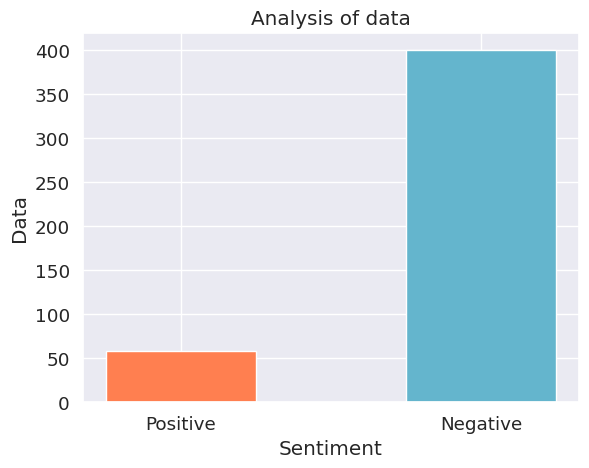

In [95]:
#bar plot
labels = ['Positive', 'Negative']
Category1 = [58, 400]
plt.bar(labels, Category1, tick_label = labels, width = 0.5, color = ['coral', 'c'])
plt.xlabel('Sentiment')
plt.ylabel('Data')
plt.title('Analysis of data')
plt.show()

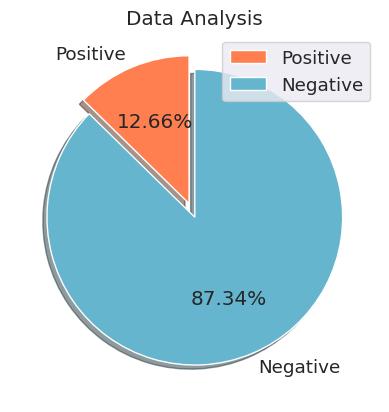

In [96]:
#pie chart
color = ['coral', 'c']
plt.pie(Category1, labels=labels, colors=color,startangle=90, shadow=True, autopct='%1.2f%%', explode=(0.1, 0))
plt.title('Data Analysis')
plt.legend()
plt.show()

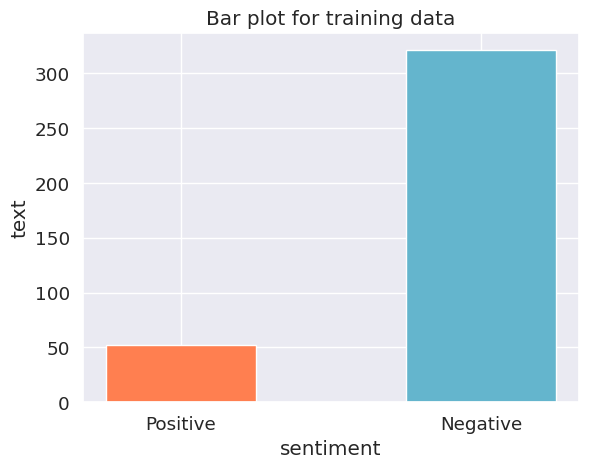

In [97]:
#Bar plot for Train Set

labels = ['Positive','Negative']
Category2 = [52, 321]
plt.bar(labels, Category2, tick_label=labels, width=0.5, color=['coral', 'c'])
plt.xlabel('sentiment')
plt.ylabel('text')
plt.title('Bar plot for training data')
plt.show()

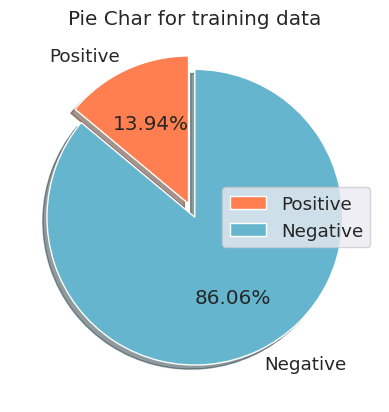

In [98]:
#pie chart for Train Set

color = ['coral', 'c']
plt.pie(Category2, labels=labels, colors=color, startangle=90, shadow=True, autopct='%1.2f%%', explode=(0.1, 0))
plt.title('Pie Char for training data')
plt.legend()
plt.show()

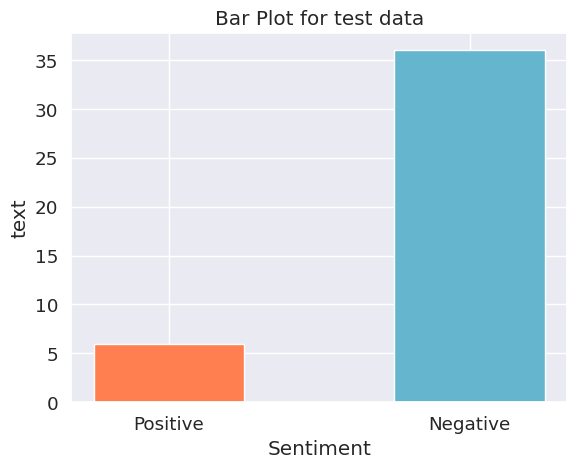

In [99]:
#Bar plot for Test Set

labels = ['Positive','Negative']
Category3 = [6, 36]
plt.bar(labels, Category3, tick_label=labels, width=0.5, color=['coral', 'c'])
plt.xlabel('Sentiment')
plt.ylabel('text')
plt.title('Bar Plot for test data')
plt.show()

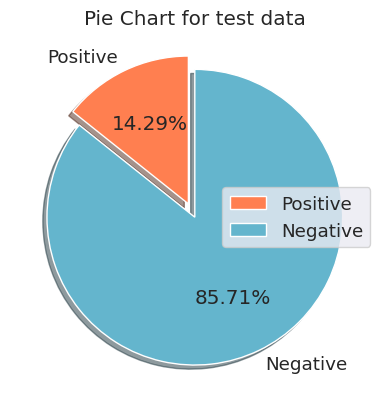

In [100]:
#pie chart for Test Set

color = ['coral', 'c']
plt.pie(Category3, labels=labels, colors=color, startangle=90, shadow=True, autopct='%1.2f%%', explode=(0.1, 0))
plt.title('Pie Chart for test data')
plt.legend()
plt.show()

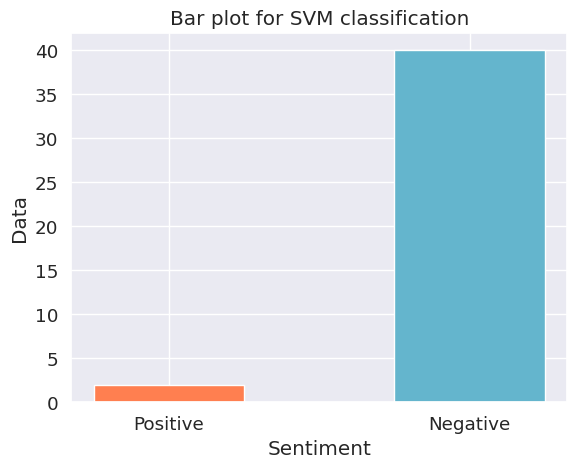

In [101]:
#Bar plot for SVM classification

labels = ['Positive','Negative']
Category4 = [2, 40]
plt.bar(labels, Category4, tick_label=labels, width=0.5, color=['coral', 'c'])
plt.xlabel('Sentiment')
plt.ylabel('Data')
plt.title('Bar plot for SVM classification')
plt.show()

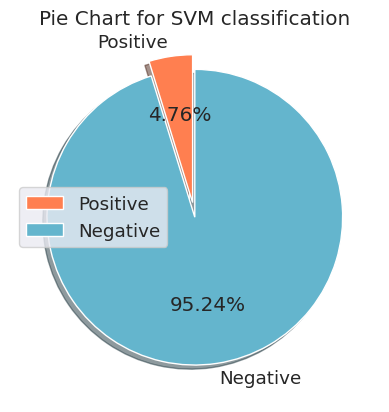

In [102]:
#pie chart for SVM classification

color = ['coral', 'c']
plt.pie(Category4, labels=labels, colors=color,startangle=90, shadow=True, autopct='%1.2f%%', explode=(0.1, 0))
plt.title('Pie Chart for SVM classification')
plt.legend()
plt.show()